# Dataset loading

In [50]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
#loading the dataset
dataset =  pd.read_csv('Bank_Customer_Churn_dataset.csv')
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
# Rownumber,customer id and surname are irrelevent data for finding exited or not
dataset.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

# Exploratory data analysis

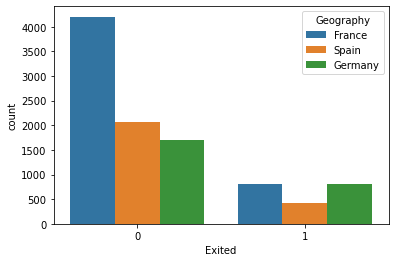

In [6]:
#Relation between Country and Exited
sns.countplot(dataset['Exited'],hue=dataset['Geography'])
#Thus bank has highest customers in France.Many exited from France and Germany.

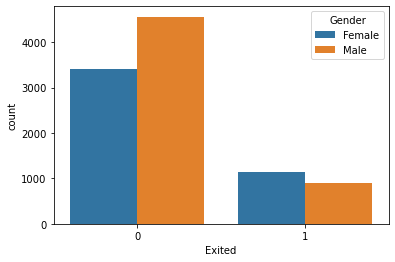

In [25]:
sns.countplot(dataset['Exited'],hue=dataset['Gender'])
#More females are exited from bank than males.

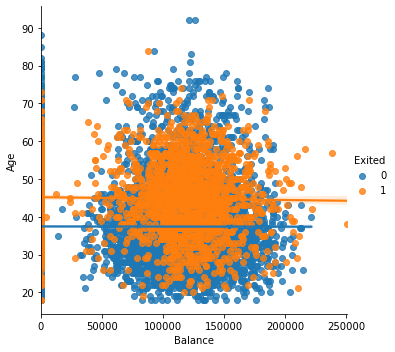

In [36]:
sns.lmplot(x='Balance',y='Age',hue='Exited',data=dataset)
#Thus old people above 45 are tends to exite more than young people below 45.

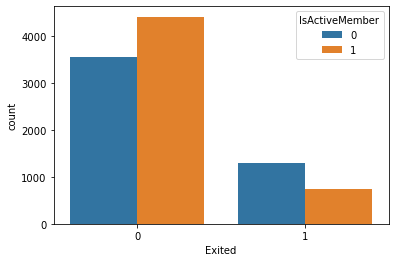

In [37]:
sns.countplot(dataset['Exited'],hue=dataset['IsActiveMember'])
#Thus, Active members more tend to leave the bank than inactive members.

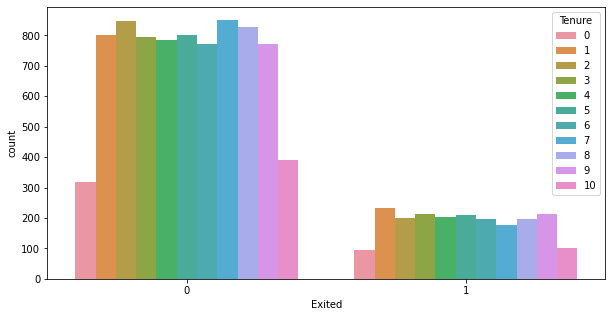

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Exited'],hue=dataset['Tenure'])
#Thus people tends to leave the bank more after 1 year.People leaving the bank is less after 9 years.

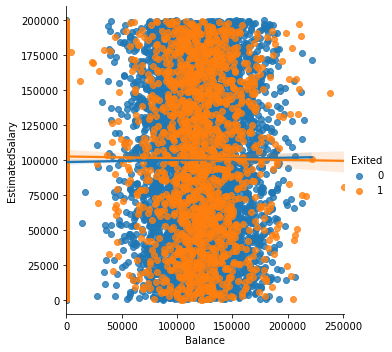

In [40]:
sns.lmplot(x='Balance',y='EstimatedSalary',hue='Exited',data=dataset)
#people whose salary is between 100000-150000 tends to exite the bank more.

# Feature engineering

In [42]:
#Assigning male=1 and female=0
def gend(val):
    if val == 'Male':
        return 1
    else:
        return 0

dataset['Gender'] = dataset['Gender'].apply(gend)

In [44]:
#rescaling values between 0-1
dataset['NumOfProducts']/=4
dataset['Tenure']/=10

In [46]:
#Applying min max scaling individually to get more accurate range.
dataset['Age'] = minmax_scale(dataset['Age'])
dataset['EstimatedSalary'] = minmax_scale(dataset['EstimatedSalary'])
dataset['Balance'] = minmax_scale(dataset['Balance'])
dataset['CreditScore'] = minmax_scale(dataset['CreditScore'])

In [47]:
#assigning dummy columns by considering each countries separatly.dropping 1 column to avoid overlapping.
df_geo = dataset['Geography']
df_geo = pd.get_dummies(df_geo,drop_first=True)
dataset.drop(['Geography'],axis=1,inplace=True)
df_final = pd.concat([dataset,df_geo],axis=1)

In [48]:
df_final.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.25,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.25,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.75,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.50,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.25,1,1,0.395400,0,0,1
5,0.590,1,0.351351,0.8,0.453394,0.50,1,0,0.748797,1,0,1
6,0.944,1,0.432432,0.7,0.000000,0.50,1,1,0.050261,0,0,0
7,0.052,0,0.148649,0.4,0.458540,1.00,1,0,0.596733,1,1,0
8,0.302,1,0.351351,0.4,0.566170,0.50,0,1,0.374680,0,0,0
9,0.668,1,0.121622,0.2,0.536488,0.25,1,1,0.358605,0,0,0


# Training and testing using Random Forest

In [49]:
X = df_final.drop('Exited',axis=1)
y = df_final['Exited']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [52]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
pred = forest.predict(X_test)
print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1967
           1       0.78      0.48      0.60       533

    accuracy                           0.86      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.85      0.86      0.85      2500


[[1895   72]
 [ 276  257]]


<h3>Its giving accuracy of 86%. We can increase accuracy by balancing the dataset.
<h3>Its also detecting people who are not exiting from bank with f1 score 92% which is importent for bank.